<a href="https://colab.research.google.com/github/d-h-k/w12_tf_ws/blob/master/firsteptf_dhkim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# p41 

In [3]:
import tensorflow as tf

a=tf.placeholder("float")
b=tf.placeholder("float")

y = tf.multiply(a,b)

sess = tf.Session()

print(sess.run(y, feed_dict={a:3, b:3}))

9.0


# 텐서보드 출력 예제, 실행안됨 -> 네이티브 환경에서 재 실행

In [8]:
tensorboard --logdir='/content'

SyntaxError: ignored

In [6]:
pwd

'/content'

# p49 변수간 관계에 대한 모델, 선형회귀분석
  - 이장에서는 가장 간단한 예제인 선형회귀분석 방법을 이용해서 변수들 사이의 관계를 분석해 보겠습니다.
  - 선형회귀는 Linear Regression 이라고 하며, 가장 간단한 형태의 알고리즘 입니다
  - 먼저 보이는 코드는 임의의 좌표를 생성하는 코드 입니다

In [0]:
import numpy as np
num_points = 1000
vectors_set = []

for i in range(num_points):
  x1 = np.random.normal(0.0, 0.55)
  y1 = x1*0.1+0.3 + np.random.normal(0.0, 0.03)
  vectors_set.append([x1,y1])
  
x_data = ia[v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

 - 아래 코드를 이용, matplotlib 라이브러리를 활용해 좌표축에 점을 찍어보겠습니다

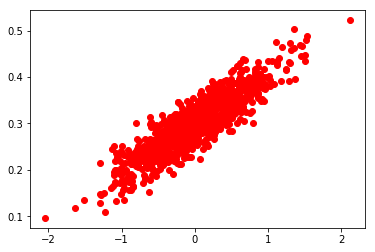

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
plt.show()

# 51p 비용함수와 경사 하강법 알고리즘
 - 학습 알고리즘을 훈련
 - 사실 우리는 위 직선이 선형회귀라는것, 그러니까 y=ax+b 형태의 방정식임을 알고있지만, 컴퓨터에게 직접 알려주지 않고 알아서 찾아가게 만드는 방법 입니다.
 - 여기서 컴퓨터(머신러닝 프레임워크) W(가중치)와 b 라는 매개변수를 계속 수정 해 가면서 답을 찾아 나갑니다
 - 지금 잘 하고 있는지 아닌지를 확인하기 위해서 비용함수를 정의합니다. 
 - 비용함수는 오차함수라고도 합니다. 결국 많은 자료들에서 말하는, Cost = error 라는 식이 성립하게 됩니다..
 - 이번 예제에서는 평균제곱오차를 사용하며, 실제 값과 알고리즘이 반복마다 추정한 값 사이의 거리를 오차로 하는 값의 평균입니다

In [0]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data +b

In [0]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [0]:
#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [33]:
for step in range(8):
  sess.run(train)
print(sess.run(W),sess.run(b))
print('Tensorflow guess : W= %f, b = %f'%(sess.run(W),sess.run(b)) )

[0.10395154] [0.2998345]
Tensorflow guess : W= 0.103952, b = 0.299834


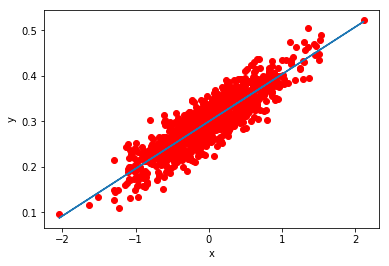

In [34]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
 - 위에 점과 텐서플로가 추측한 관계식을 그래프에서 확인할 수 있다